# Q-Learning HW

Homework Description:

In this homework, you are going to use table based QLearning and SARSA for two Gym environment you choose.

One of them should be cart-pole.

Here are the exploration tasks for this assignment.

For each game environment:
1. 	What is the best way to represent state?
*	Try at least two different ways of representing the state including directly using the observations, and see how they affect the algorithm’s performance for either Q or SARSA.
*	For this exploration, you can keep other parameters in Q or SARSA constant


2.	Using the best state representation you got from step 1, compare the performance of Q and SARSA.
*	Vary the learning rate (alpha)
*	Vary gamma
*	Vary the exploration policy, i.e., can you do something better than epsilon-greedy?


Turn in:
1. the entire project with a readme file for how to run your code
2. report from your explorations
3. discussions on the results of your exploration. In particular, compare the the results you got with your previous results using rule based and GA.



## README

As this project is contained in a colab project, just hitting run all should work well enough.\
However, if you want to run a section again, I would make sure you start running it from the top of the section.\
The cells are split for ease of parsing, and some variables have the same name across sections to make their purpose clear in the context of their local functions.

### Reading results

To read the printed out results of the experimentation, it is in the form of:

**Agent_Type**: **Learning Rate**, **Discount Factor** , **Exploration Rate** - **Average Score**

**Agent_Type** determines whether the actor is a SARSA actor or QTable actor

**Learning Rate**, **Discount Factor** (gamma), and **Exploration Rate** all show which parameters the agents were trained on.

**Average Score** is the sum of all scores for the agent after running through 100-1000 games and dividing that sum by the amount of games.

For example:\
**QTable**: **Learning Rate** = 0.1, **Discount Factor** = 0.9, **Exploration Rate** = 0.5 - **Average Score**: 22.37

The above agent is a QTable agent, it was trained with a learning rate of .1, a discount factor (gamma) of .9, and an exploration rate of .5. \
Its average performance got it a score of 22.37.

For this agent, it rates future rewards highly, explores about half the time, and learns a bit more slowly than other setups I tested.



There are also graphs under the printed out data to show the score compared with the parameter settings individually.

## Qtable and SARSA class setups

In [ ]:
import numpy as np

class QTable:
  def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1):
    self.q_table = np.zeros((state_space_size, action_space_size))
    self.learning_rate = learning_rate
    self.discount_factor = discount_factor
    self.exploration_rate = exploration_rate

  def get_action(self, state):
    if np.random.uniform(0, 1) < self.exploration_rate:
      return np.random.choice(self.q_table.shape[1])  # Choose a random action
    else:
      return np.argmax(self.q_table[state])  # Choose the action with the highest Q-value

  def update(self, state, action, reward, next_state):
    # Q(s, a) = Q(s, a) + alpha * [reward + gamma * max_a'(Q(s', a')) - Q(s, a)]

    # print(state)
    # print(action)
    # print(reward)
    # print(next_state)

    best_next_action = np.argmax(self.q_table[next_state])
    td_target = reward + self.discount_factor * self.q_table[next_state, best_next_action]
    td_error = td_target - self.q_table[state, action]
    self.q_table[state, action] += self.learning_rate * td_error

  def print_q_table(self):
    print(self.q_table)

In [ ]:
class SARSA:
  def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1):
    self.q_table = np.zeros((state_space_size, action_space_size))
    self.learning_rate = learning_rate
    self.discount_factor = discount_factor
    self.exploration_rate = exploration_rate

  def get_action(self, state):
    if np.random.uniform(0, 1) < self.exploration_rate:
      return np.random.choice(self.q_table.shape[1])  # Choose a random action
    else:
      return np.argmax(self.q_table[state])  # Choose the action with the highest Q-value

  def update(self, state, action, reward, next_state, next_action):
    # Q(s, a) = Q(s, a) + alpha * [reward + gamma * Q(s', a') - Q(s, a)]
    td_target = reward + self.discount_factor * self.q_table[next_state, next_action]
    td_error = td_target - self.q_table[state, action]
    self.q_table[state, action] += self.learning_rate * td_error

## Cartpole Representation Experimentation

In [ ]:
import gym
import math
import numpy as np

# Create the CartPole environment
env = gym.make('CartPole-v1')

# set up Qtable and run for 10 episodes.
# State space is the 30 degree arc the pole can exist in with some buffer.
qtab_degrees = QTable(30, 2, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1)

# 0-11 leaning left
# 12-24 leaning right

# Training loop

#increasing training time
num_episodes = 50000

max_angle = float('-inf')
min_angle = float('inf')

for episode in range(num_episodes):
  state = env.reset()
  angle = int(math.degrees(state[2]))+14
  done = False

  while not done:
        # Choose action using epsilon-greedy policy
        action = qtab_degrees.get_action(angle)

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        next_angle = int(math.degrees(next_state[2]))+14
        # print(next_angle)

        # Update Q-value using the Bellman equation
        qtab_degrees.update(angle, action, reward, next_angle)

        angle = next_angle

        if angle > max_angle:
          max_angle = angle
        if angle < min_angle:
          min_angle = angle

# print("Max Angle:", max_angle)
# print("Min Angle:", min_angle)
# print(qtab_degrees.print_q_table())
env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
env = gym.make('CartPole-v1')

# set up Qtable and run for 10 episodes.
# State space is the 2 directions the pole can be in.
qtab_directions = QTable(2, 2, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1)

# 0 left
# 1 right

# Training loop

num_episodes = 50000

for episode in range(num_episodes):
  state = env.reset()
  angle = int(math.degrees(state[2]))
  done = False

  if angle >= 0:
    angle = 1
  else:
    angle = 0

  while not done:
        # Choose action using epsilon-greedy policy
        action = qtab_directions.get_action(angle)

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        next_angle = int(math.degrees(next_state[2]))
        # print(next_angle)

        if next_angle >= 0:
          next_angle = 1
        else:
          next_angle = 0

        # Update Q-value using the Bellman equation
        qtab_directions.update(angle, action, reward, next_angle)

        angle = next_angle

env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env = gym.make('CartPole-v1')

degrees_max_score = 0

for episode in range(100):

  # After training, use the learned Q-table to play the game optimally
  state = env.reset()
  angle = int(math.degrees(state[2]))+14
  done = False
  total_reward = 0
  while not done:
      action = qtab_degrees.get_action(angle)
      next_state, reward, done, _ = env.step(action)
      total_reward += reward
      next_angle = int(math.degrees(next_state[2]))+14
      # print("Angle:", angle, "Action:", action, "Reward:", reward, "Next Angle:", next_angle)
      angle = next_angle

  # print(f"Episode {episode} Total Reward:", total_reward)


  degrees_max_score += total_reward



env.close()

In [ ]:
env = gym.make('CartPole-v1')

direction_max_score = 0

for episode in range(100):

  # After training, use the learned Q-table to play the game optimally
  state = env.reset()
  angle = int(math.degrees(state[2]))

  if angle >= 0:
    angle = 1
  else:
    angle = 0

  done = False
  total_reward = 0
  while not done:
      action = qtab_directions.get_action(angle)
      next_state, reward, done, _ = env.step(action)
      total_reward += reward
      next_angle = int(math.degrees(next_state[2]))

      if next_angle >= 0:
        next_angle = 1
      else:
        next_angle = 0

      # print("Angle:", angle, "Action:", action, "Reward:", reward, "Next Angle:", next_angle)
      angle = next_angle

  # print("Total Reward:", total_reward)

  direction_max_score += total_reward

print("Average Score (Qtable Degrees):", degrees_max_score/100)
print("Average Score (Qtable Direction):", direction_max_score/100)

env.close()

Average Score (Qtable Degrees): 32.63
Average Score (Qtable Direction): 9.96


### Cartpole Representation Analysis

For this experiment with using Q-table, the more effective method of representing the state was to represent the full arc of degrees that the pole could exist in rather than just representing the direction the pole is leaning in.

The average score for the full arc hovers around 26-30, while the average score for the direction representation was around 9-10.

I would guess that since there are not enough spaces in the directions qtable, the rewards or pentalties from completed games have trouble spreading properly.\
In a way, the values in the table lack the context of how close the pole is to forcing the game to end.

## Cartpole - SARSA vs. QTABLE


For these experiments, I will be trying to detect the effects on the final score for the Qtable and Sarsa agents when I modify the learning rate, discount factor, and exploration rate from the default.

For each experiment, I will be training an agent with each permutation of the parameters I have set.

At the end of all the training loops, I will run each agent many times and get the average score for that agent.

In [ ]:
# Agents Setup - Using Degrees since that was the better representation

# Create the CartPole environment
env = gym.make('CartPole-v1')

#setting up the conditions.
l_rate = [0.1, 0.5, 0.9]
dis_fac = [0.9, 0.5, 0.1]
exp_rate = [0.1, 0.5, 0.9]

#Agent Storage
sarsa_agents = {}
qtable_agents = {}

# Set up agents

for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      sarsa_agents[(l, d, e)] = SARSA(32, 2, learning_rate=l, discount_factor=d, exploration_rate=e)
      qtable_agents[(l, d, e)] = QTable(32, 2, learning_rate=l, discount_factor=d, exploration_rate=e)


In [ ]:
#training loops

for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      sarsa_agent = sarsa_agents[(l, d, e)]

      # Training loop
      num_episodes = 50000

      for episode in range(num_episodes):
        state = env.reset()
        angle = int(math.degrees(state[2])) + 14  # Discretize the angle
        done = False

        # Get the initial action for the current state
        action = sarsa_agent.get_action(angle)

        while not done:
          # Take the action and observe the next state and reward
          next_state, reward, done, _ = env.step(action)
          next_angle = int(math.degrees(next_state[2])) + 14

          # Get the next action for the next state
          next_action = sarsa_agent.get_action(next_angle)

          # Update the Q-value using the SARSA update rule
          sarsa_agent.update(angle, action, reward, next_angle, next_action)

          # Update the current state and action
          angle = next_angle
          action = next_action


In [ ]:
for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      q_agent = qtable_agents[(l, d, e)]

      # Training loop
      num_episodes = 50000

      for episode in range(num_episodes):
        state = env.reset()
        angle = int(math.degrees(state[2])) + 14  # Discretize the angle
        done = False

        # Get the initial action for the current state
        action = q_agent.get_action(angle)

        while not done:
          # Take the action and observe the next state and reward
          next_state, reward, done, _ = env.step(action)
          next_angle = int(math.degrees(next_state[2])) + 14

          # Get the next action for the next state
          next_action = q_agent.get_action(next_angle)

          # Update the Q-value using the SARSA update rule
          q_agent.update(angle, action, reward, next_angle)

          # Update the current state and action
          angle = next_angle
          action = next_action

      env.close()

In [ ]:
# Initialize dictionaries to store average scores for each agent type and parameter combination
average_sarsa_scores = {}
average_qtable_scores = {}

# Loop through each parameter combination and evaluate the corresponding agents
for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:
      # Evaluate SARSA agent
      sarsa_agent = sarsa_agents[(l, d, e)]
      env = gym.make('CartPole-v1')
      total_sarsa_reward = 0
      for episode in range(100):
        state = env.reset()
        angle = int(math.degrees(state[2])) + 14
        done = False
        episode_reward = 0
        while not done:
          action = sarsa_agent.get_action(angle)
          next_state, reward, done, _ = env.step(action)
          next_angle = int(math.degrees(next_state[2])) + 14
          episode_reward += reward
          angle = next_angle
        total_sarsa_reward += episode_reward
      average_sarsa_scores[(l, d, e)] = total_sarsa_reward / 100
      env.close()

      # Evaluate Q-table agent
      q_agent = qtable_agents[(l, d, e)]
      env = gym.make('CartPole-v1')
      total_qtable_reward = 0
      for episode in range(100):
        state = env.reset()
        angle = int(math.degrees(state[2])) + 14
        done = False
        episode_reward = 0
        while not done:
          action = q_agent.get_action(angle)
          next_state, reward, done, _ = env.step(action)
          next_angle = int(math.degrees(next_state[2])) + 14
          episode_reward += reward
          angle = next_angle
        total_qtable_reward += episode_reward
      average_qtable_scores[(l, d, e)] = total_qtable_reward / 100
      env.close()


In [ ]:
# Combine scores from both agents into a single list of tuples
all_scores = []
for params, score in average_sarsa_scores.items():
  all_scores.append(("SARSA", params, score))
for params, score in average_qtable_scores.items():
  all_scores.append(("QTable", params, score))

# Sort the combined list in descending order of score
all_scores.sort(key=lambda x: x[2], reverse=True)

# Print the sorted results
for agent_type, params, score in all_scores:
  print(f"{agent_type}: Learning Rate = {params[0]}, Discount Factor = {params[1]}, Exploration Rate = {params[2]} - Average Score: {score}")

SARSA: Learning Rate = 0.9, Discount Factor = 0.1, Exploration Rate = 0.5 - Average Score: 32.74
SARSA: Learning Rate = 0.1, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 30.54
QTable: Learning Rate = 0.9, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: 25.99
QTable: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: 25.5
SARSA: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.9 - Average Score: 25.41
SARSA: Learning Rate = 0.1, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: 25.29
SARSA: Learning Rate = 0.9, Discount Factor = 0.5, Exploration Rate = 0.9 - Average Score: 24.77
QTable: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.9 - Average Score: 23.85
QTable: Learning Rate = 0.5, Discount Factor = 0.5, Exploration Rate = 0.9 - Average Score: 23.68
QTable: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.5 - Average Score: 23.62
SARSA: Learning Rate = 0.5

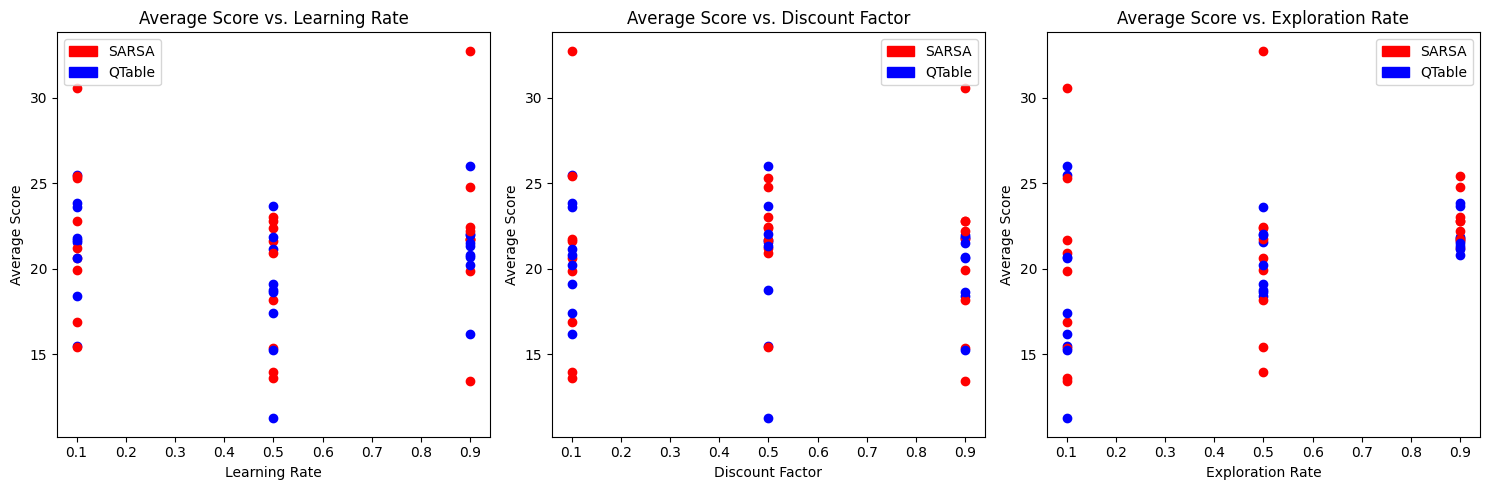

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract learning rates, discount factors, and exploration rates for plotting
learning_rates = sorted(list(set([params[0] for params in average_sarsa_scores.keys()])))
discount_factors = sorted(list(set([params[1] for params in average_sarsa_scores.keys()])))
exploration_rates = sorted(list(set([params[2] for params in average_sarsa_scores.keys()])))

# Create subplots for each parameter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot average score vs. learning rate
for df in discount_factors:
  for er in exploration_rates:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for lr in learning_rates]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for lr in learning_rates]
    axs[0].scatter(learning_rates, sarsa_scores, label="SARSA", c='r')
    axs[0].scatter(learning_rates, qtable_scores, label="QTable", c='b')
axs[0].set_xlabel("Learning Rate")
axs[0].set_ylabel("Average Score")
axs[0].set_title("Average Score vs. Learning Rate")
red_patch = mpatches.Patch(color='red', label='SARSA')
blue_patch = mpatches.Patch(color='blue', label='QTable')
axs[0].legend(handles=[red_patch, blue_patch])

# Plot average score vs. discount factor
for lr in learning_rates:
  for er in exploration_rates:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for df in discount_factors]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for df in discount_factors]
    axs[1].scatter(discount_factors, sarsa_scores, label=f"SARSA (lr={lr}, er={er})", c='r')
    axs[1].scatter(discount_factors, qtable_scores, label=f"QTable (lr={lr}, er={er})", c='b')
axs[1].set_xlabel("Discount Factor")
axs[1].set_ylabel("Average Score")
axs[1].set_title("Average Score vs. Discount Factor")
axs[1].legend(handles=[red_patch, blue_patch])

# Plot average score vs. exploration rate
for lr in learning_rates:
  for df in discount_factors:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for er in exploration_rates]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for er in exploration_rates]
    axs[2].scatter(exploration_rates, sarsa_scores, label='SARSA', c='r')
    axs[2].scatter(exploration_rates, qtable_scores, label="Qtable", c='b')
axs[2].set_xlabel("Exploration Rate")
axs[2].set_ylabel("Average Score")
axs[2].set_title("Average Score vs. Exploration Rate")
axs[2].legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

### Cartpole - Sarsa vs. Qtable

After looking through the results, we can see that the performance of Qtable and Sarsa is pretty similar for both approaches, but on the whole SARSA did better.

SARSA: Learning Rate = 0.9, Discount Factor = 0.1, Exploration Rate = 0.5 - Average Score: 32.74\
SARSA: Learning Rate = 0.1, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 30.54\
QTable: Learning Rate = 0.9, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: 25.99

Looking at the top three performers, we can see that the main factor affecting the best performance was having a high discount factor and lower exploration and learning rates.\
By considering the future rewards more, the agent could stay up longer. And by reducing the amount it experimented, it would usually avoid forcing the pole to fall.

Neat!

## Blackjack Representation Experimentation

For these experiments, using SARSA, I want to try representing the state using only the actor's score and another version taking the dealer's shown card into account.

In [ ]:
# Blackjack SARSA Training Loop - Individual Score Representation

#Putting a lot of buffer into the dealer inclusive table because the state representation can vary wildly
sarsa_indv = SARSA(30, 2, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1)
sarsa_dealer = SARSA(240, 2, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1)

# Create the Blackjack environment
env = gym.make('Blackjack-v1')

# Training loop
num_episodes = 50000

for episode in range(num_episodes):
  state = env.reset()
  player_sum = state[0]
  done = False

  # Get the initial action for the current state
  action = sarsa_indv.get_action(player_sum - 12)

  while not done:
    # Take the action and observe the next state and reward
    next_state, reward, done, _ = env.step(action)
    next_player_sum = next_state[0]

    # Get the next action for the next state
    next_action = sarsa_indv.get_action(next_player_sum - 12)

    # Update the Q-value using the SARSA update rule
    sarsa_indv.update(player_sum - 12, action, reward, next_player_sum - 12, next_action)

    # Update the current state and action
    player_sum = next_player_sum
    action = next_action


env.close()

# Blackjack SARSA Training Loop - Individual and Dealer Score Representation

# Create the Blackjack environment
env = gym.make('Blackjack-v1')

# Training loop
num_episodes = 10000

for episode in range(num_episodes):
  state = env.reset()
  player_sum = state[0] #What's the player's current score
  dealer_card = state[1] #
  usable_ace = state[2]
  state_int = (player_sum - 12) * 10 + (dealer_card - 1) * 1 + usable_ace * 20
  done = False

  # Get the initial action for the current state
  action = sarsa_dealer.get_action(state_int)

  while not done:
    # Take the action and observe the next state and reward
    next_state, reward, done, _ = env.step(action)
    next_player_sum = next_state[0]
    next_dealer_card = next_state[1]
    next_usable_ace = next_state[2]
    next_state_int = (next_player_sum - 12) * 10 + (next_dealer_card - 1) * 1 + next_usable_ace * 20

    # Get the next action for the next state
    next_action = sarsa_dealer.get_action(next_state_int)

    # Update the Q-value using the SARSA update rule
    sarsa_dealer.update(state_int, action, reward, next_state_int, next_action)

    # Update the current state and action
    player_sum = next_player_sum
    dealer_card = next_dealer_card
    usable_ace = next_usable_ace
    state_int = next_state_int
    action = next_action

env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
# Evaluation Loop - Individual Score
env = gym.make('Blackjack-v1')
total_indv_reward = 0
for episode in range(1000):
    state = env.reset()
    player_sum = state[0]
    done = False
    episode_reward = 0
    while not done:
        action = sarsa_indv.get_action(player_sum - 12)
        next_state, reward, done, _ = env.step(action)
        next_player_sum = next_state[0]
        episode_reward += reward
        player_sum = next_player_sum
    total_indv_reward += episode_reward

average_indv_score = total_indv_reward / 1000
env.close()

# Evaluation Loop - Individual and Dealer Score
env = gym.make('Blackjack-v1')
total_dealer_reward = 0
for episode in range(1000):
    state = env.reset()
    player_sum = state[0]
    dealer_card = state[1]
    usable_ace = state[2]
    state_int = (player_sum - 12) * 10 + (dealer_card - 1) * 1 + usable_ace * 20
    done = False
    episode_reward = 0
    while not done:
        action = sarsa_dealer.get_action(state_int)
        next_state, reward, done, _ = env.step(action)
        next_player_sum = next_state[0]
        next_dealer_card = next_state[1]
        next_usable_ace = next_state[2]
        next_state_int = (next_player_sum - 12) * 10 + (next_dealer_card - 1) * 1 + next_usable_ace * 20
        episode_reward += reward
        player_sum = next_player_sum
        dealer_card = next_dealer_card
        usable_ace = next_usable_ace
        state_int = next_state_int
    total_dealer_reward += episode_reward

average_dealer_score = total_dealer_reward / 1000
env.close()

print("Average Score (SARSA Individual):", average_indv_score)
print("Average Score (SARSA Dealer):", average_dealer_score)

# Can look here to see if you need more buffer
# Since python lists can use negative integers, the buffer will be in the middle of the list.

# print(f"SARSA Individual Table:\n{sarsa_indv.q_table}\n\n")
# print(f"SARSA Dealer Table:\n{sarsa_dealer.q_table}")

# The table is organized to be [stay, hit]. You can see how higher scores lead to staying
# While smaller scores lead to hitting.

Average Score (SARSA Individual): -0.222
Average Score (SARSA Dealer): -0.226


In this case, the performance is much closer than Cartpole.

In fact, I could run the scores twice and get either representation beating the other. As a matter of preference I chose to use the Individual representation since I thought it would be faster to train it and less memory intensive for comparing Qtable and SARSA implementations.

## Blackjack - Qtable vs SARSA

Doing the same form of experimentation as I did for Cartpole, modifying the learning, discount, and exploration rates.

In [ ]:
# Agents Setup - Using Individual

# Create the CartPole environment
env = gym.make('Blackjack-v1')

#setting up the conditions.
l_rate = [0.1, 0.5, 0.9]
dis_fac = [0.9, 0.5, 0.1]
exp_rate = [0.1, 0.5, 0.9]

#Agent Storage
sarsa_agents = {}
qtable_agents = {}

# Set up agents

for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      sarsa_agents[(l, d, e)] = SARSA(30, 2, learning_rate=l, discount_factor=d, exploration_rate=e)
      qtable_agents[(l, d, e)] = QTable(30, 2, learning_rate=l, discount_factor=d, exploration_rate=e)

In [ ]:
#sarsa training loops

num_episodes = 50000

for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      sarsa_agent = sarsa_agents[(l, d, e)]

      # Training loop
      for episode in range(num_episodes):
        state = env.reset()
        player_sum = state[0]
        done = False

        # Get the initial action for the current state
        action = sarsa_indv.get_action(player_sum - 12)

        while not done:
          # Take the action and observe the next state and reward
          next_state, reward, done, _ = env.step(action)
          next_player_sum = next_state[0]

          # Get the next action for the next state
          next_action = sarsa_indv.get_action(next_player_sum - 12)

          # Update the Q-value using the SARSA update rule
          sarsa_indv.update(player_sum - 12, action, reward, next_player_sum - 12, next_action)

          # Update the current state and action
          player_sum = next_player_sum
          action = next_action

In [ ]:
for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      qtable_agent = qtable_agents[(l, d, e)]

      # Training loop
      for episode in range(num_episodes):
        state = env.reset()
        player_sum = state[0]
        done = False

        # Get the initial action for the current state
        action = qtable_agent.get_action(player_sum - 12)

        while not done:
          # Take the action and observe the next state and reward
          next_state, reward, done, _ = env.step(action)
          next_player_sum = next_state[0]

          # Get the next action for the next state
          next_action = qtable_agent.get_action(next_player_sum - 12)

          # Update the Q-value using the SARSA update rule
          qtable_agent.update(player_sum - 12, action, reward, next_player_sum - 12)

          # Update the current state and action
          player_sum = next_player_sum
          action = next_action

In [ ]:
# Initialize dictionaries to store average scores for each agent type and parameter combination
average_sarsa_scores = {}
average_qtable_scores = {}

# Loop through each parameter combination and evaluate the corresponding agents
for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:
      # Evaluate SARSA agent
      sarsa_agent = sarsa_agents[(l, d, e)]
      env = gym.make('Blackjack-v1')
      total_indv_reward = 0
      for episode in range(1000):
          state = env.reset()
          player_sum = state[0]
          done = False
          episode_reward = 0
          while not done:
              action = sarsa_agent.get_action(player_sum - 12)
              next_state, reward, done, _ = env.step(action)
              next_player_sum = next_state[0]
              episode_reward += reward
              player_sum = next_player_sum
          total_indv_reward += episode_reward

      average_indv_score = total_indv_reward / 1000
      env.close()

      # Evaluate Q-table agent
      q_agent = qtable_agents[(l, d, e)]
      env = gym.make('Blackjack-v1')
      total_indv_reward = 0
      for episode in range(1000):
          state = env.reset()
          player_sum = state[0]
          done = False
          episode_reward = 0
          while not done:
              action = q_agent.get_action(player_sum - 12)
              next_state, reward, done, _ = env.step(action)
              next_player_sum = next_state[0]
              episode_reward += reward
              player_sum = next_player_sum
          total_indv_reward += episode_reward

      average_indv_score = total_indv_reward / 1000
      env.close()

      average_sarsa_scores[(l, d, e)] = average_indv_score
      average_qtable_scores[(l, d, e)] = average_indv_score

In [ ]:
# Combine scores from both agents into a single list of tuples
all_scores = []
for params, score in average_sarsa_scores.items():
  all_scores.append(("SARSA", params, score))
for params, score in average_qtable_scores.items():
  all_scores.append(("QTable", params, score))

# Sort the combined list in descending order of score
all_scores.sort(key=lambda x: x[2], reverse=True)

# Print the sorted results
for agent_type, params, score in all_scores:
  print(f"{agent_type}: Learning Rate = {params[0]}, Discount Factor = {params[1]}, Exploration Rate = {params[2]} - Average Score: {score}")

SARSA: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.069
QTable: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.069
SARSA: Learning Rate = 0.1, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: -0.116
QTable: Learning Rate = 0.1, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: -0.116
SARSA: Learning Rate = 0.5, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.149
QTable: Learning Rate = 0.5, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.149
SARSA: Learning Rate = 0.9, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.155
QTable: Learning Rate = 0.9, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.155
SARSA: Learning Rate = 0.5, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: -0.164
QTable: Learning Rate = 0.5, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: -0.164
SARSA: Learning

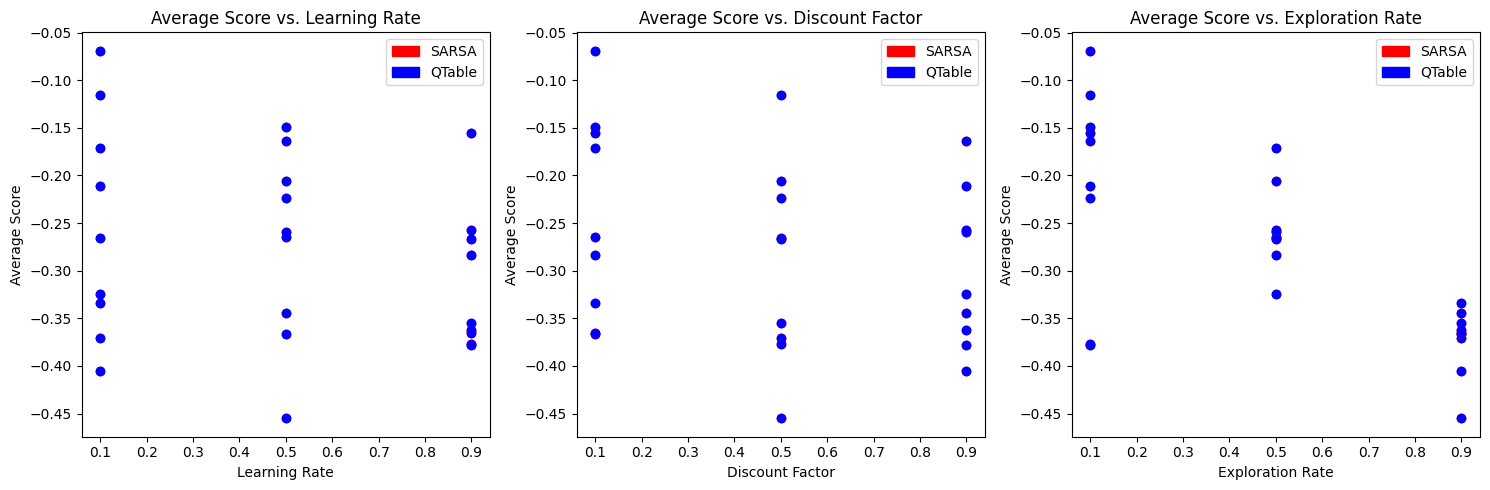

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract learning rates, discount factors, and exploration rates for plotting
learning_rates = sorted(list(set([params[0] for params in average_sarsa_scores.keys()])))
discount_factors = sorted(list(set([params[1] for params in average_sarsa_scores.keys()])))
exploration_rates = sorted(list(set([params[2] for params in average_sarsa_scores.keys()])))

# Create subplots for each parameter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot average score vs. learning rate
for df in discount_factors:
  for er in exploration_rates:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for lr in learning_rates]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for lr in learning_rates]
    axs[0].scatter(learning_rates, sarsa_scores, label="SARSA", c='r')
    axs[0].scatter(learning_rates, qtable_scores, label="QTable", c='b')
axs[0].set_xlabel("Learning Rate")
axs[0].set_ylabel("Average Score")
axs[0].set_title("Average Score vs. Learning Rate")
red_patch = mpatches.Patch(color='red', label='SARSA')
blue_patch = mpatches.Patch(color='blue', label='QTable')
axs[0].legend(handles=[red_patch, blue_patch])

# Plot average score vs. discount factor
for lr in learning_rates:
  for er in exploration_rates:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for df in discount_factors]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for df in discount_factors]
    axs[1].scatter(discount_factors, sarsa_scores, label=f"SARSA (lr={lr}, er={er})", c='r')
    axs[1].scatter(discount_factors, qtable_scores, label=f"QTable (lr={lr}, er={er})", c='b')
axs[1].set_xlabel("Discount Factor")
axs[1].set_ylabel("Average Score")
axs[1].set_title("Average Score vs. Discount Factor")
axs[1].legend(handles=[red_patch, blue_patch])

# Plot average score vs. exploration rate
for lr in learning_rates:
  for df in discount_factors:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for er in exploration_rates]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for er in exploration_rates]
    axs[2].scatter(exploration_rates, sarsa_scores, label='SARSA', c='r')
    axs[2].scatter(exploration_rates, qtable_scores, label="Qtable", c='b')
axs[2].set_xlabel("Exploration Rate")
axs[2].set_ylabel("Average Score")
axs[2].set_title("Average Score vs. Exploration Rate")
axs[2].legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

This performance is interesting, SARSA and Qtable are performing exactly the same!

SARSA: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.069\
QTable: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.069\
SARSA: Learning Rate = 0.1, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: -0.116\
QTable: Learning Rate = 0.1, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: -0.116\
SARSA: Learning Rate = 0.5, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.149\
QTable: Learning Rate = 0.5, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: -0.149

It does show how a low Learning and Exploration rate leads to the highest average score for the agents. The Discount Factor (gamma) seems to be a bit important, but not particularly as the learning and Exploration rates.

Like in real life, moving conservatively helps in gambling. Or at least in Blackjack.

I would guess that the reason there is no difference between SARSA and QTable is because the best action to take is always the action you would've taken in that situation anyway.\
With the action space only being two options, there are very few things to explore at a certain point and the goal is always to get as close as possible to 21.

## Frozen Lake Representation Experimentation

I couldn't think of anything that could be a better or different representation of the state beside the single number the environment gives you to show the coordinates of a space on the frozen lake, so I decided to skip straight ahead to comparing the performance of the Qtable and SARSA actors.

## Frozen Lake - Qtable vs SARSA

Again, doing a similar experimental setup varying the learning, discount, and exploration rates.

In [ ]:
# Agents Setup - Using Individual

# Create the CartPole environment
env = gym.make('FrozenLake-v1')

#setting up the conditions.
l_rate = [0.1, 0.5, 0.9]
dis_fac = [0.9, 0.5, 0.1]
exp_rate = [0.1, 0.5, 0.9]

#Agent Storage
sarsa_agents = {}
qtable_agents = {}

# Set up agents

for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      sarsa_agents[(l, d, e)] = SARSA(16, 4, learning_rate=l, discount_factor=d, exploration_rate=e)
      qtable_agents[(l, d, e)] = QTable(16, 4, learning_rate=l, discount_factor=d, exploration_rate=e)

In [ ]:
#sarsa training loops

num_episodes = 100000

for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      sarsa_agent = sarsa_agents[(l, d, e)]

      # Training loop
      for episode in range(num_episodes):
        state = env.reset()
        done = False

        # Get the initial action for the current state
        action = sarsa_indv.get_action(state)

        while not done:
          # Take the action and observe the next state and reward
          next_state, reward, done, _ = env.step(action)

          # Get the next action for the next state
          next_action = sarsa_indv.get_action(next_state)

          # Update the Q-value using the SARSA update rule
          sarsa_indv.update(state, action, reward, next_state, next_action)

          # Update the current state and action
          state = next_state
          action = next_action

In [ ]:
for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:

      qtable_agent = qtable_agents[(l, d, e)]

      # Training loop
      for episode in range(num_episodes):
        state = env.reset()
        done = False

        # Get the initial action for the current state
        action = qtable_agent.get_action(state)

        while not done:
          # Take the action and observe the next state and reward
          next_state, reward, done, _ = env.step(action)

          # Get the next action for the next state
          next_action = qtable_agent.get_action(next_state)

          # Update the Q-value using the SARSA update rule
          qtable_agent.update(state, action, reward, next_state)

          # Update the current state and action
          state = next_state
          action = next_action

In [ ]:
# Initialize dictionaries to store average scores for each agent type and parameter combination
average_sarsa_scores = {}
average_qtable_scores = {}

# Loop through each parameter combination and evaluate the corresponding agents
for l in l_rate:
  for d in dis_fac:
    for e in exp_rate:
      # Evaluate SARSA agent
      sarsa_agent = sarsa_agents[(l, d, e)]
      env = gym.make('FrozenLake-v1')
      total_indv_reward = 0
      for episode in range(1000):
          state = env.reset()
          done = False
          episode_reward = 0
          while not done:
              action = sarsa_agent.get_action(state)
              next_state, reward, done, _ = env.step(action)
              episode_reward += reward
              state = next_state
          total_indv_reward += episode_reward

      average_indv_score = total_indv_reward / 1000
      env.close()

      # Evaluate Q-table agent
      q_agent = qtable_agents[(l, d, e)]
      env = gym.make('FrozenLake-v1')
      total_indv_reward = 0
      for episode in range(1000):
          state = env.reset()
          done = False
          episode_reward = 0
          while not done:
              action = q_agent.get_action(state)
              next_state, reward, done, _ = env.step(action)
              episode_reward += reward
              state = next_state
          total_indv_reward += episode_reward

      average_indv_score = total_indv_reward / 1000
      env.close()

      average_sarsa_scores[(l, d, e)] = average_indv_score
      average_qtable_scores[(l, d, e)] = average_indv_score

In [ ]:
# Combine scores from both agents into a single list of tuples
all_scores = []
for params, score in average_sarsa_scores.items():
  all_scores.append(("SARSA", params, score))
for params, score in average_qtable_scores.items():
  all_scores.append(("QTable", params, score))

# Sort the combined list in descending order of score
all_scores.sort(key=lambda x: x[2], reverse=True)

# Print the sorted results
for agent_type, params, score in all_scores:
  print(f"{agent_type}: Learning Rate = {params[0]}, Discount Factor = {params[1]}, Exploration Rate = {params[2]} - Average Score: {score}")

SARSA: Learning Rate = 0.1, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.401
QTable: Learning Rate = 0.1, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.401
SARSA: Learning Rate = 0.5, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.107
QTable: Learning Rate = 0.5, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.107
SARSA: Learning Rate = 0.9, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.095
QTable: Learning Rate = 0.9, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.095
SARSA: Learning Rate = 0.9, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: 0.088
QTable: Learning Rate = 0.9, Discount Factor = 0.5, Exploration Rate = 0.1 - Average Score: 0.088
SARSA: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: 0.072
QTable: Learning Rate = 0.1, Discount Factor = 0.1, Exploration Rate = 0.1 - Average Score: 0.072
SARSA: Learning Rate = 0.

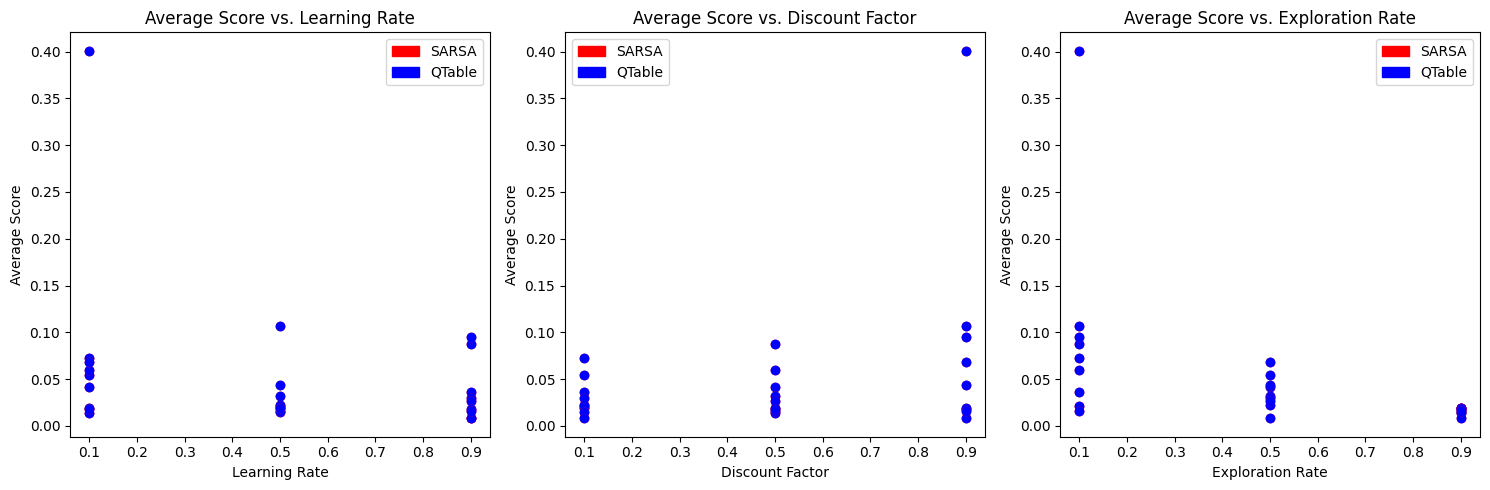

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract learning rates, discount factors, and exploration rates for plotting
learning_rates = sorted(list(set([params[0] for params in average_sarsa_scores.keys()])))
discount_factors = sorted(list(set([params[1] for params in average_sarsa_scores.keys()])))
exploration_rates = sorted(list(set([params[2] for params in average_sarsa_scores.keys()])))

# Create subplots for each parameter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot average score vs. learning rate
for df in discount_factors:
  for er in exploration_rates:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for lr in learning_rates]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for lr in learning_rates]
    axs[0].scatter(learning_rates, sarsa_scores, label="SARSA", c='r')
    axs[0].scatter(learning_rates, qtable_scores, label="QTable", c='b')
axs[0].set_xlabel("Learning Rate")
axs[0].set_ylabel("Average Score")
axs[0].set_title("Average Score vs. Learning Rate")
red_patch = mpatches.Patch(color='red', label='SARSA')
blue_patch = mpatches.Patch(color='blue', label='QTable')
axs[0].legend(handles=[red_patch, blue_patch])

# Plot average score vs. discount factor
for lr in learning_rates:
  for er in exploration_rates:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for df in discount_factors]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for df in discount_factors]
    axs[1].scatter(discount_factors, sarsa_scores, label=f"SARSA (lr={lr}, er={er})", c='r')
    axs[1].scatter(discount_factors, qtable_scores, label=f"QTable (lr={lr}, er={er})", c='b')
axs[1].set_xlabel("Discount Factor")
axs[1].set_ylabel("Average Score")
axs[1].set_title("Average Score vs. Discount Factor")
axs[1].legend(handles=[red_patch, blue_patch])

# Plot average score vs. exploration rate
for lr in learning_rates:
  for df in discount_factors:
    sarsa_scores = [average_sarsa_scores[(lr, df, er)] for er in exploration_rates]
    qtable_scores = [average_qtable_scores[(lr, df, er)] for er in exploration_rates]
    axs[2].scatter(exploration_rates, sarsa_scores, label='SARSA', c='r')
    axs[2].scatter(exploration_rates, qtable_scores, label="Qtable", c='b')
axs[2].set_xlabel("Exploration Rate")
axs[2].set_ylabel("Average Score")
axs[2].set_title("Average Score vs. Exploration Rate")
axs[2].legend(handles=[red_patch, blue_patch])

plt.tight_layout()
plt.show()

Top 3 pairs:

SARSA: Learning Rate = 0.1, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.401\
QTable: Learning Rate = 0.1, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.401\
SARSA: Learning Rate = 0.5, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.107\
QTable: Learning Rate = 0.5, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.107\
SARSA: Learning Rate = 0.9, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.095\
QTable: Learning Rate = 0.9, Discount Factor = 0.9, Exploration Rate = 0.1 - Average Score: 0.095

Valuing the future rewards highly lead to better success here, I would guess that would be because the positive reward is only gained upon reaching the goal.\
If we don't value future rewards enough, the score would not transmit enough for the agent to consistenly find and follow it.

# Overall Discussion

## Report from Explorations

* ### Cartpole Summary

More representation in the table makes Q-table agents more effective and the main factor affecting the best performance was having a high discount factor and lower exploration and learning rates.

* ### Blackjack Summary

Luck has a greater influence on the performance of the Blackjack agent than the choice of representing just the player's choice vs including input from the dealer. In addition, the scores show how a low Learning and Exploration rate leads to the highest average score for the agents. The Discount Factor (gamma) seems to be a bit important, but not particularly as the learning and Exploration rates. The best choice of action is shared between agents as they train.

* ### Frozen Lake Summary

Like Blackjack, there was little variation between QTable and SARSA's performance, and having low Learning and Exploration rates in comparison to a high Discount factor (gamma) led to the best average performances.

## Qtable and SARSA vs Rule Based and GA

From the main comparison point of cartpole, without implementing a Neural Network as a part of these Qtables and SARSA agents, It seems to me like the Previous approaches were much more successful at reaching the full score of the game.

My GA implementation for Cartpole was able to hit the average score of 500
(max you can get) within a couple hundred generations. My implementation of the Qtable and SARSA could only reach a max average of around 30 points even with 10000 iterations of training.

I think my implementation of this using just the table is not dynamic enough to match the performance of my GA algorithm, but I would be interested in seeing how the Qtable NN performs when I have the time to implement it.

## Future plans
Wanted to try the Upper Confidence Bound exploration algorithm as an alternative to epsilon greedy, but couldn't figure it out in time. So I just varied the epsilon rate between low (0.1), medium (0.5), and high (0.9).

Possibly this Friday I'll try to implement the version I found here: https://banditalgs.com/2016/09/18/the-upper-confidence-bound-algorithm/
as more of a personal time project.